# Exploratory data analysis

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('listings_cleaned.csv')
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3585 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   bedrooms                3585 non-null   float64
 6   bed_type                3585 non-null   object 
 7   beds                    3585 non-null   float64
 8   price                   3585 non-null   float64
 9   cleaning_fee            3585 non-null   int64  
 10  availability_365        3585 non-null   int64  
 11  guests_included         3585 non-null   int64  
 12  extra_people            3585 non-null   int64  
 13  security_deposit        3585 non-null   int64  
 14  minimum_nights          3585 non-null   

# Data Visualisation for Some Variables

* Q1: What is the relationship between some feature and price ?

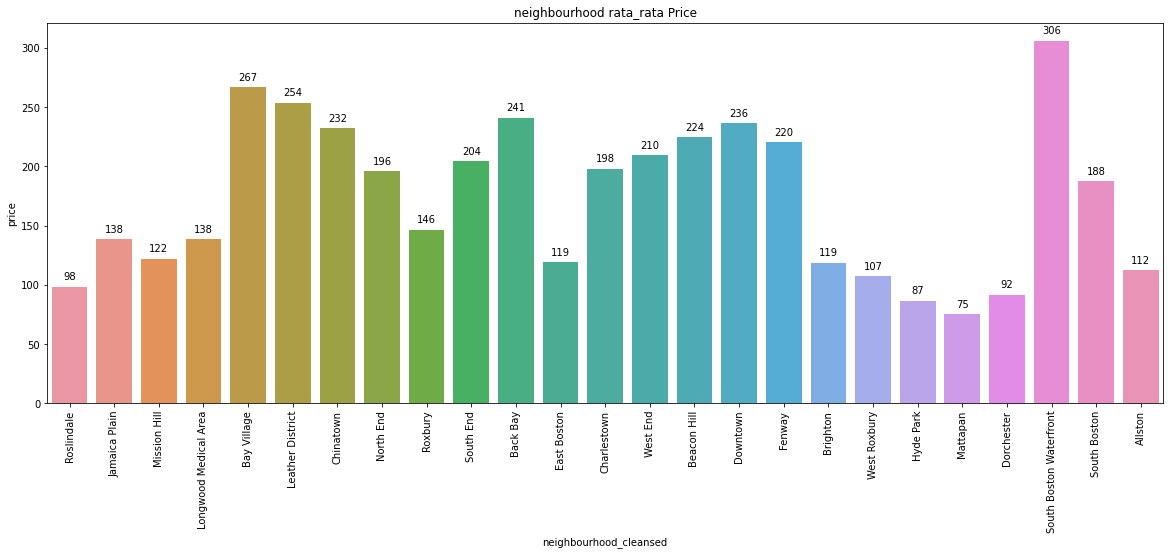

In [4]:
#Checking the average pricing based on neighbourhood
plt.figure(figsize=(20,7))
g=sns.barplot(x='neighbourhood_cleansed',y='price',data=df,ci=None)#ci=None for removing error bar line
plt.title('neighbourhood rata_rata Price')
plt.xticks(rotation=90)
for p in g.patches:# function for adding values at the tip of bar plots
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('1.png',dpi=100)
plt.show()

The areas of South Boston Waterfront, Bay Village and Back Bay have higher average prices

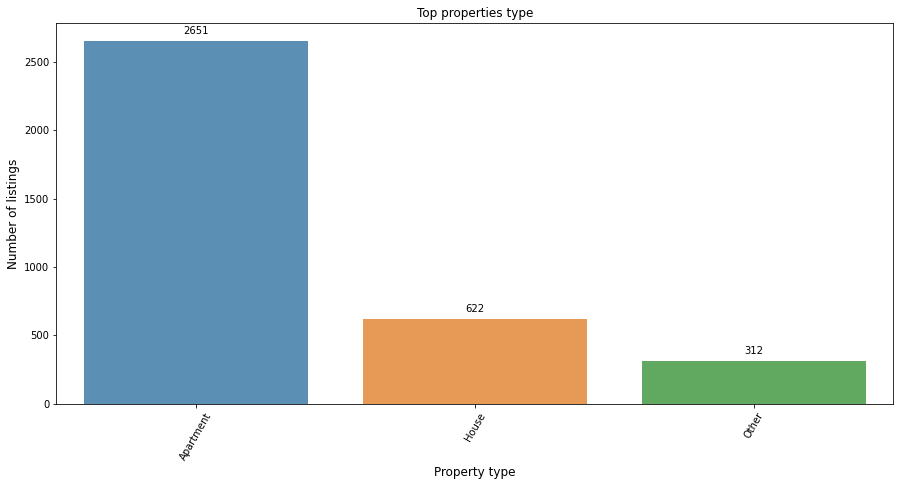

In [5]:
#Exploring property_type data in and around Boston
property_type_count  = df['property_type'].value_counts()[:20,]
plt.figure(figsize=(15,7))
g=sns.barplot(property_type_count.index, property_type_count.values, alpha=0.8)
plt.title('Top properties type')
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Property type', fontsize=12)
plt.xticks(rotation=60)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('2.png',dpi=100)    
plt.show()

3.Let’s check that Number of listings by room_type with a bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

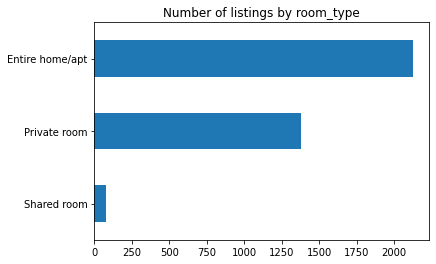

In [6]:
df.room_type.value_counts().sort_values().plot.barh()
plt.title("Number of listings by room_type")
plt.savefig('3.png',dpi=100)
plt.show

Harga rata-rata tertinggi berdasarkan tipe ruangan yang disewakan di Singapore yaitu Rumah/Apartemen.

4.Let’s check that Number of listings by neighbourhood with a bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

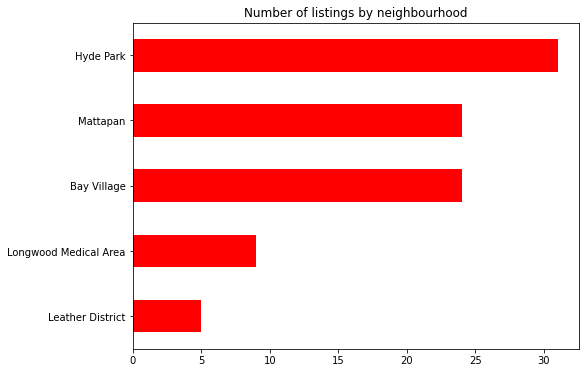

In [7]:
df.neighbourhood_cleansed.value_counts().sort_values(ascending=True).head().plot.barh(figsize=(8,6),color="r")
plt.title("Number of listings by neighbourhood")
plt.savefig('4.png',dpi=100)
plt.show

## Price of Neighbourhood

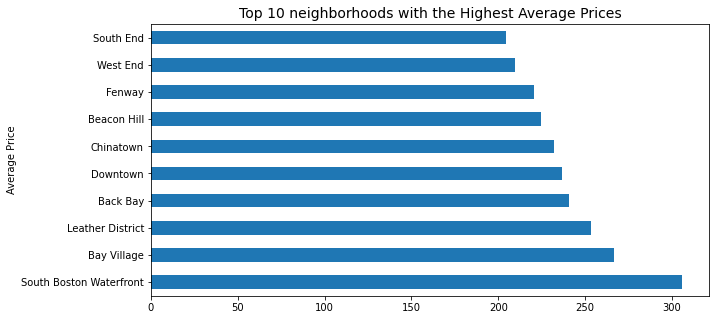

In [8]:
plt.figure(figsize = (10,5))
df.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh')
plt.title('Top 10 neighborhoods with the Highest Average Prices', fontsize=14)
plt.ylabel('Average Price')
plt.savefig('5.png',dpi=100)
plt.show()

**Property and room types**

<function matplotlib.pyplot.show(close=None, block=None)>

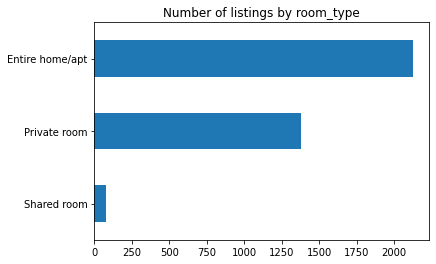

In [9]:
df.room_type.value_counts().sort_values().plot.barh()
plt.title("Number of listings by room_type")
plt.savefig('6.png',dpi=100)
plt.show

menunjukkan harga tertinggi ada di persewaan untuk room type pada entire home/apt

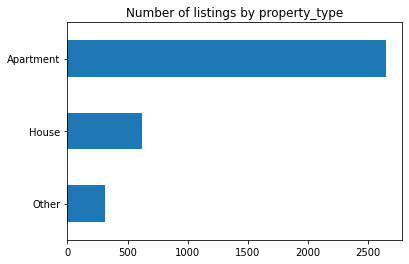

In [10]:
df.property_type.value_counts().sort_values().plot.barh()
plt.title("Number of listings by property_type")
plt.savefig('7.png',dpi=100)

# internet

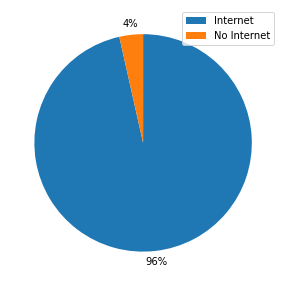

In [12]:
plt.figure(figsize = [5,5])
sorted_counts = df['internet'].value_counts()
plt.pie(sorted_counts,startangle = 90, counterclock = False, autopct='%1.0f%%',\
       pctdistance=1.1,labeldistance=1.3)
plt.legend(labels = ['Internet','No Internet'])
plt.show()

Kami dapat melihat bahwa rumah AirBNB dengan ketersediaan internet menempati hingga 97% dari total listing rumah AirBNB! Hal ini menunjukkan bahwa hampir semua orang mencari rumah dengan ketersediaan layanan internet. Sekarang, mari kita lihat seberapa besar layanan ini memengaruhi harga rata-rata sebuah rumah.

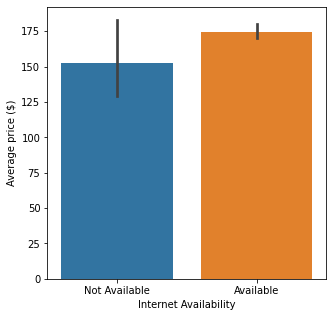

In [14]:
plt.figure(figsize = [5,5])
sns.barplot(data = df, y = 'price',x='internet')
plt.ylabel('Average price ($)');
plt.xlabel('Internet Availability');
plt.xticks(ticks = [0,1], labels = ['Not Available','Available'])
plt.savefig('8.png',dpi=100)
plt.show()

Kita dapat melihat bahwa ketersediaan internet menaikkan harga rata-rata sewa rumah hampir $ 30,00. Jadi untuk menjawab pertanyaan tersebut, tuan rumah harus berinvestasi dalam membuat layanan ini tersedia, tidak hanya menaikkan nilai harga propery, tetapi juga menarik perhatian kebanyakan orang, karena inilah yang mereka cari.

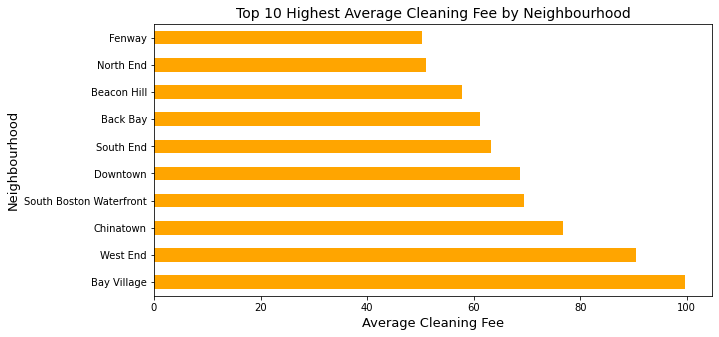

In [15]:
plt.figure(figsize = (10,5))
df.groupby('neighbourhood_cleansed').cleaning_fee.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh', color='orange')
plt.title('Top 10 Highest Average Cleaning Fee by Neighbourhood', fontsize=14)
plt.ylabel('Neighbourhood', fontsize= 13)
plt.xlabel('Average Cleaning Fee', fontsize= 13)
plt.savefig('9.png',dpi=100)
plt.show()

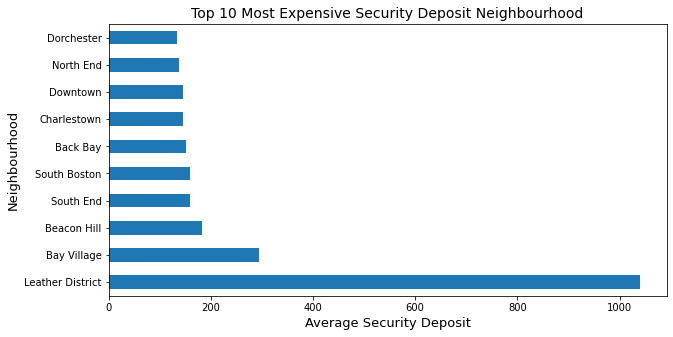

In [16]:
plt.figure(figsize = (10,5))
df.groupby('neighbourhood_cleansed').security_deposit.mean().sort_values(ascending = False).iloc[:10].plot(kind='barh',)
plt.title('Top 10 Most Expensive Security Deposit Neighbourhood', fontsize=14)
plt.ylabel('Neighbourhood', fontsize= 13)
plt.xlabel('Average Security Deposit', fontsize= 13)
plt.savefig('10.png',dpi=100)
plt.show()

#### 3. How does the location, property type, room type ,bed type and cancellation_policy impact the listing price?

In [17]:
categorical_list = ['neighbourhood_cleansed', 
                        'property_type','room_type','bed_type', 
                        'cancellation_policy']

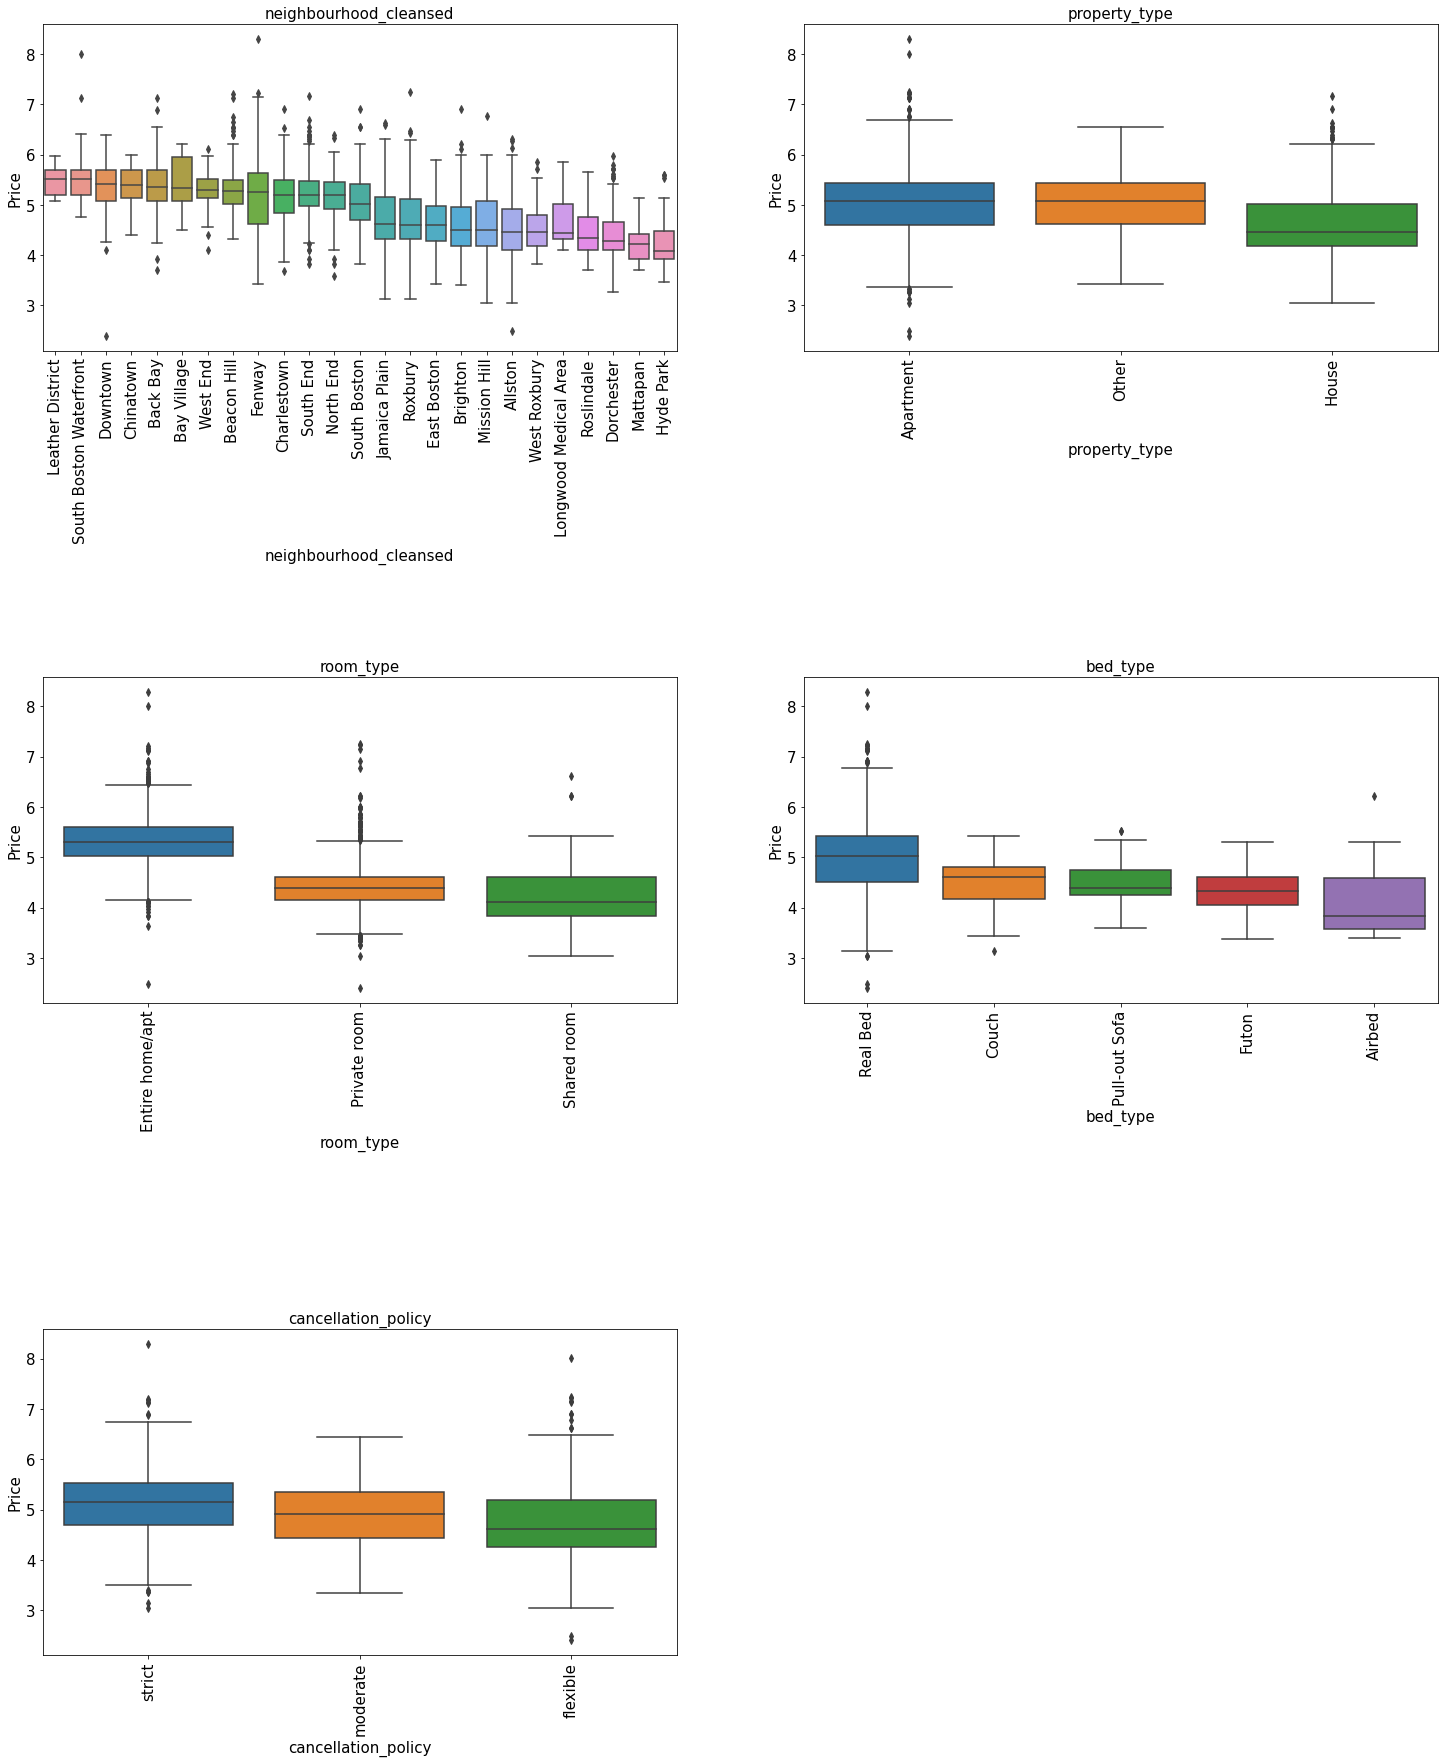

In [19]:
plt.figure(figsize=(25, 30))

# Plot boxplot for each individual categorical variable vs price

# The total number of categorical variables in listing dataframe
n = len(categorical_list)

for i in range(len(categorical_list)):
    plt.subplot((n+1)//2, 2, i+1)
    order = df.groupby(categorical_list[i]).log_price.median().reset_index().sort_values('log_price', ascending=False)[categorical_list[i]].to_list()
    sns.boxplot(data=df, x=categorical_list[i], y='log_price', order=order)
    plt.xticks(fontsize=15, rotation=90)
    plt.yticks(fontsize=15)
    plt.ylabel('Price', fontsize=15)
    plt.xlabel(categorical_list[i], fontsize=15)
    plt.title(categorical_list[i], fontsize=15)
    plt.subplots_adjust(hspace=1.0, wspace=0.2);

dapat di simpulkan banyak kecenderungan analisis data fitur dengan target(price), maka kita lanjutkan dengan Machine Learning